### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
print(data.info())
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
# Determine the precent of data missing and drop the columns with more than 50% missing data
qc_perc_null = data.isnull().sum()/len(data)*100
print(f"Percentage of missing data; {qc_perc_null}\n")

print(f"Drop columns; {qc_perc_null[qc_perc_null > 50]}")
data = data.drop(columns = qc_perc_null[qc_perc_null >= 50].index)

print(f"Info: \n{data.info()}")

#kaggle kernels pull themlphdstudent/cheat-sheet-seaborn-charts

Percentage of missing data; destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

Drop columns; car    99.148534
dtype: float64
<class 'pandas.core.frame.

In [6]:
## Determine how many total rows need to be dropped due to missing data in any column


# get number of nulls for each column
qc_null = data.isnull().sum()
print(type(qc_null))
# Get column list for missing indecies
null_cols = qc_null.index[qc_null.values > 0].to_list()
print(null_cols)


dict_missing_idxs = {}  #Dictionary of missing indexes by column name
for col in null_cols:
    dict_missing_idxs[col] = data.index[data[col].isnull()].to_list()


<class 'pandas.core.series.Series'>
['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


In [7]:
data.isnull()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# Get dictionary of missing values for each column
dict_missing_idxs = (
    data.isnull()
    .apply(lambda col: col.index[col].tolist(), axis=0)
    .to_dict()
)

In [9]:
# Determine all unique rows that have missing data in any column
unique_missing_rows = list(set().union(*dict_missing_idxs.values()))
type(unique_missing_rows)

print(f'There are {len(unique_missing_rows):,} unique rows of {data.shape[0]:,} total rows ({(len(unique_missing_rows)/data.shape[0])*100:.1f} %) that have one or more missing values across the whole data set')

There are 605 unique rows of 12,684 total rows (4.8 %) that have one or more missing values across the whole data set


In [10]:
## drop all rows with missing values
data = data.dropna()


# get number of nulls for each column
qc_null = data.isnull().sum()
print(qc_null)



destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


4. What proportion of the total observations chose to accept the coupon?



In [13]:
print(f'The total proportion that accpeted a coupon is {round(data['Y'].mean(),2)}')

The total proportion that accpeted a coupon is 0.57


5. Use a bar plot to visualize the `coupon` column.

<Axes: xlabel='coupon'>

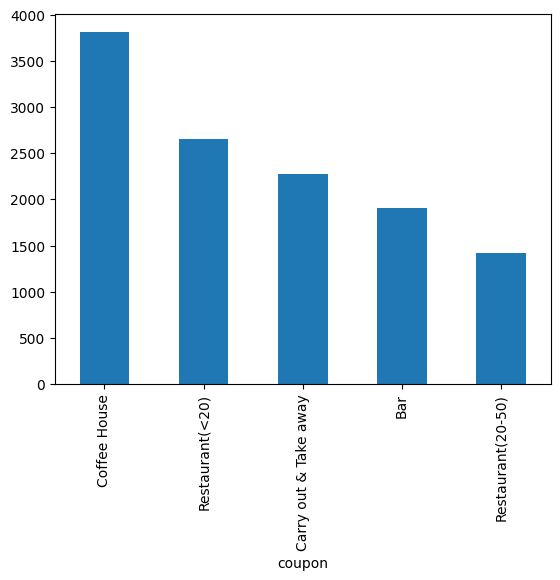

In [14]:
data.coupon.value_counts().plot(kind='bar')

<Axes: xlabel='weather'>

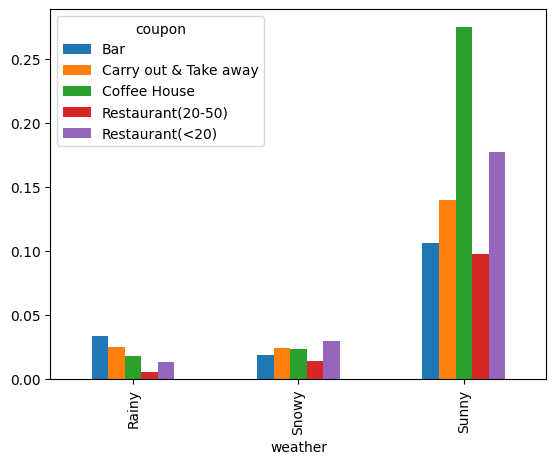

In [15]:
pd.crosstab(data.weather, data.coupon, normalize=True).plot(kind='bar')

<Axes: xlabel='coupon', ylabel='count'>

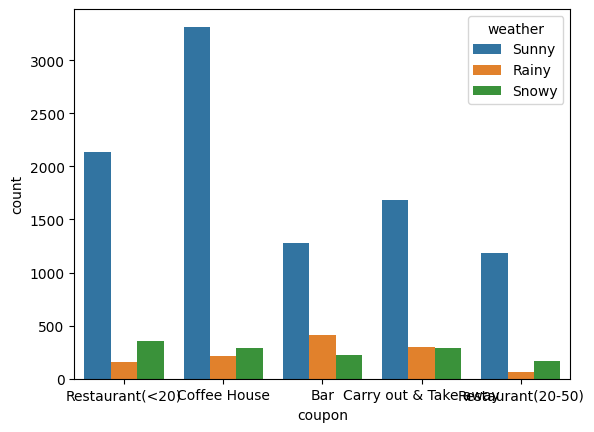

In [16]:
sns.countplot(data=data, x="coupon", hue="weather")

6. Use a histogram to visualize the temperature column.

In [17]:
#data.temperature.value_counts().plot(kind='bar')

<Axes: xlabel='temperature'>

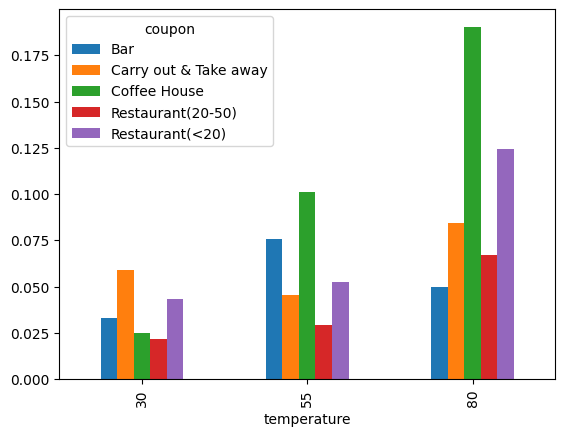

In [18]:
pd.crosstab(data.temperature, data.coupon, normalize=True).plot(kind='bar')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [19]:
data.Bar.unique()


array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [20]:
bar_coupon_df = data[data["coupon"] == 'Bar']

bar_coupon_df = bar_coupon_df.rename(columns={'Y': 'Accepted_Coupon'})
bar_coupon_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1913 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passanger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   object
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null   obj

2. What proportion of bar coupons were accepted?


Proportion of bar coupons accepted was 0.41


Text(0, 0.5, '')

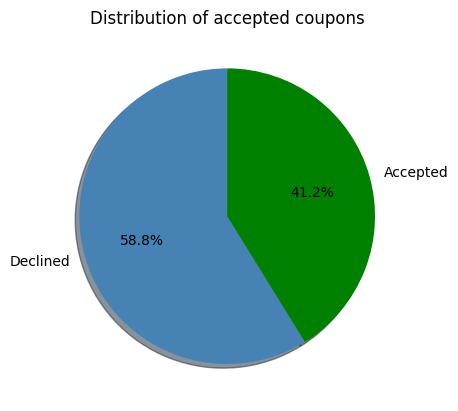

In [21]:
print(f"Proportion of bar coupons accepted was {bar_coupon_df["Accepted_Coupon"][bar_coupon_df["Accepted_Coupon"]==1].sum()/bar_coupon_df.shape[0]:.02f}")

value_counts = bar_coupon_df['Accepted_Coupon'].value_counts()
value_counts.plot.pie(autopct='%1.1f%%', startangle=90, labels=['Declined', 'Accepted'], colors=['steelblue','green'], shadow=True)
plt.title('Distribution of accepted coupons')
plt.ylabel('')
#plt.pie(bar_coupon_df['Y'].value_counts(), labels=['no','yes'], autopct='%1.1f%%')
# pie plot of accpetance 
#bar_coupon_df.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


The coupon accpetance rate for those who went to the bar <=3 times (0.37) compared to those that went >3 times ({num_bar_gt3:0.2f}) per month.
There is a 2.0 fold inrease acceptance rate for those who go to bars >3 times a month.


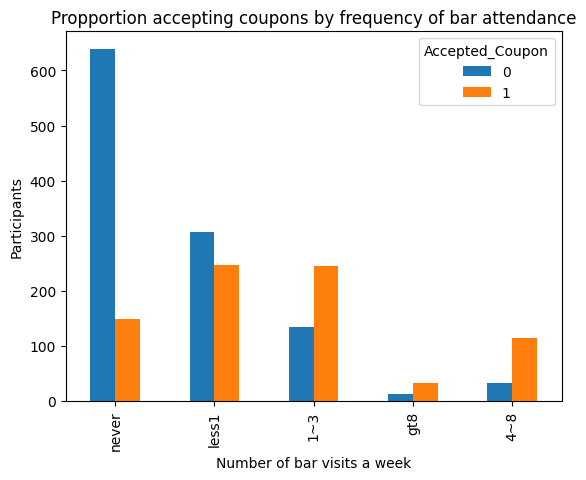

In [22]:

num_bar_less3 = bar_coupon_df.query("Bar in ['never', 'less1', '1~3'] and Accepted_Coupon == 1").shape[0]/bar_coupon_df.query("Bar in ['never', 'less1', '1~3']").shape[0]
num_bar_gt3 = bar_coupon_df.query("Bar in ['gt8', '4~8'] and Accepted_Coupon == 1").shape[0]/bar_coupon_df.query("Bar in ['gt8', '4~8']").shape[0]

# print the rates for each group and generate a bar plot
print(
    f"The coupon accpetance rate for those who went to the bar <=3 times ({num_bar_less3:0.2f})"
      " compared to those that went >3 times ({num_bar_gt3:0.2f}) per month."
)

if num_bar_gt3 >= num_bar_less3:
    print(f"There is a {num_bar_gt3/num_bar_less3:0.1f} fold inrease acceptance rate for those who go to bars >3 times a month.")
else:
    print(f"There is a {num_bar_less3/num_bar_gt3:0.1f} fold inreased acceptance rate for those who go to bars <=3 times a month.")




# Visualize the ratio for acdeptance amongst the populations of bar visitors.
bar_order = ['never', 'less1', '1~3', 'gt8', '4~8']


ct = pd.crosstab(bar_coupon_df.Bar, bar_coupon_df.Accepted_Coupon) #,  normalize=True)
#print(ct)

ct_reordered = ct.reindex(bar_order)
ct_reordered.plot(kind='bar')
plt.title('Propportion accepting coupons by frequency of bar attendance')
plt.xlabel('Number of bar visits a week')
plt.ylabel('Participants')
plt.show()



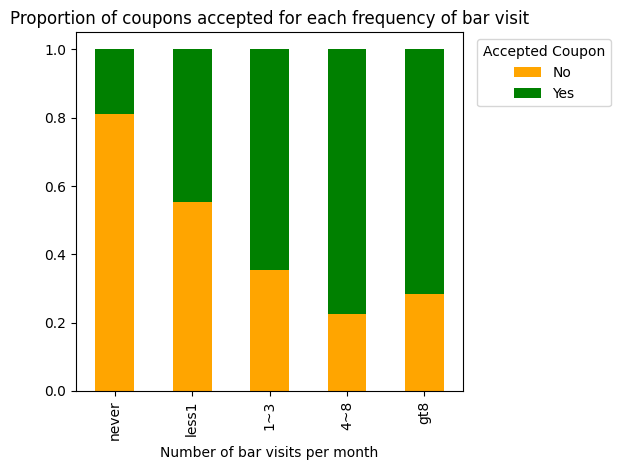

In [23]:

# Visualize the ratio for acdeptance amongst the populations of bar visitors.
bar_order = ['never', 'less1', '1~3', '4~8', 'gt8' ]

# visualize in stacked format with normalization on.
proportions = (
    bar_coupon_df.groupby('Bar')['Accepted_Coupon']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)


proportions.loc[bar_order].plot(kind='bar', stacked=True, color=['orange','green'])
plt.title('Proportion of coupons accepted for each frequency of bar visit')
plt.legend(title='Accepted Coupon', labels=['No','Yes'], loc='upper right', bbox_to_anchor=(1.4, 1))
plt.xlabel('Number of bar visits per month')
plt.tight_layout()
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


The rate of coupon acceptance is:
	0.7 for age over 25 and at least 1 visit / month
	0.43 for age under 25 and at least 1 visit / month


Text(0, 0.5, 'Rate')

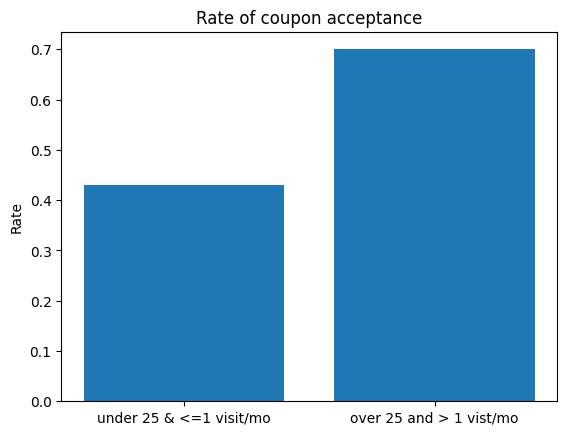

In [24]:
# understand what types of values are in 'age'
#print(f"List of unique values in age {bar_coupon_df['age'].unique()}")

# create lists to capture ages above and below 25
filter_above25 = ['46', '26', '31', '41', '50plus', '36']
filter_bellow25 = ['21', 'below21']

## bar filters
# Because the request is for the number "who go to ta bar more than once a month" and one of the values for 'bar' is 1~3, 
#   the number of rows that fall into the 1~3 category will need to be slit into 1 and 2~3 with the assumption there is 
#   an equal number of occurances of 1, 2 and 3 times a week.


# make a new column called barB for spliting '1~3' into '1' and '2~3'
bar_coupon_df['BarB'] = bar_coupon_df['Bar']

# Get indecies for Bar == '1~3'
idxs = bar_coupon_df.index[bar_coupon_df['BarB']=='1~3'].tolist()

# Change the BarB for 1/3 of the numbers to '1' and the other 2/3 to '2~3'
idxs_onethird = random.sample(idxs, len(idxs) // 3)
idxs_twothirds = [num for num in idxs if num not in idxs_onethird]

bar_coupon_df.loc[idxs_onethird, 'BarB'] = '1'
bar_coupon_df.loc[idxs_twothirds, 'BarB'] = '2~3'

# check this worked
#print(bar_coupon_df['BarB'].unique())

# filters for bars to get 1 or less and greater than 1
filter_gt1_barB =  ['2~3', 'gt8', '4~8']
filter_lt1_barB = ['never', 'less1', '1']



# get rate for more than 1 visit per month and age over 25
filtered_df = bar_coupon_df.query("BarB in @filter_gt1_barB and age in @filter_above25")
rate_gt1_over25 = round(
    filtered_df.query("Accepted_Coupon == 1").shape[0]/ filtered_df.shape[0]
    ,2)

# get rate for less than 1 visit per month and age under 25
filtered_df = bar_coupon_df.query("BarB in @filter_lt1_barB and age in @filter_bellow25")
rate_lt1_below25 = round(
    filtered_df.query("Accepted_Coupon == 1").shape[0]/ filtered_df.shape[0]
    ,2)

print(f"The rate of coupon acceptance is:")  
print(f"\t{rate_gt1_over25} for age over 25 and at least 1 visit / month")
print(f"\t{rate_lt1_below25} for age under 25 and at least 1 visit / month")


plt.bar(["under 25 & <=1 visit/mo", 'over 25 and > 1 vist/mo'], height=[rate_lt1_below25, rate_gt1_over25])
plt.title('Rate of coupon acceptance')
plt.ylabel('Rate')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [25]:

# Get list of categories for when there is a non-kid passanger
#print(bar_coupon_df.passanger.unique())
filter_passanger = ['Friend(s)', 'Partner']

#print(bar_coupon_df.occupation.unique())
filter_occcupation = ['Farming Fishing & Forestry']

group_a = bar_coupon_df.query("BarB in @filter_gt1_barB and passanger in @filter_passanger and occupation not in @filter_occcupation")

group_a_rate = round(group_a.query("Accepted_Coupon == 1").shape[0] / group_a.shape[0], 2)

print(
    f"The acceptance rate for those that visited the bar more than once a month and are not working in {filter_occcupation} was {group_a_rate}," 
    f"\nwhile the remaining participants had an acceptance rate of {round(bar_coupon_df.Accepted_Coupon.mean(),2)}."
      )

The acceptance rate for those that visited the bar more than once a month and are not working in ['Farming Fishing & Forestry'] was 0.7,
while the remaining participants had an acceptance rate of 0.41.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [26]:
## go to bars more than once a month, had passengers that were not a kid, and were not widowed
group_a_df = bar_coupon_df.query("BarB in @filter_gt1_barB and passanger in @filter_passanger and maritalStatus not in 'Widowed' ")

## go to bars more than once a month and are under the age of 30 
filter_age_u30 = ['21', '26', 'below21']

group_b_df = bar_coupon_df.query("BarB in @filter_gt1_barB and age in @filter_age_u30")

## go to cheap restaurants more than 4 times a month and income is less than 50K
#print(bar_coupon_df.income.unique())
filter_income_u50k = ['Less than $12500', '$12500 - $24999',  '$25000 - $37499', '$37500 - $49999' ]

#print(bar_coupon_df.RestaurantLessThan20.unique())
filter_restaurant_cheap = ['4~8',  'gt8']

group_c_df = bar_coupon_df.query("income in @filter_income_u50k and RestaurantLessThan20 in @filter_restaurant_cheap")

## merge dataframes and get unique rows
group_merged_df  = pd.concat([group_a_df, group_b_df, group_c_df]).sort_index().drop_duplicates()


print(round(group_merged_df['Accepted_Coupon'].mean(),2))
print(
    f"The rate of coupon acceptance is:\n"
    f"\t{round(group_a_df['Accepted_Coupon'].mean(),2)} for bar visit frequency of >1/month, with adult passanger and widowed\n"
    f"\t{round(group_b_df['Accepted_Coupon'].mean(),2)} for bar visit frequency of >1/month, and under 30 years of age\n"
    f"\t{round(group_c_df['Accepted_Coupon'].mean(),2)} for those who eat >4 times month at a cheap restraunt and earn under $50K/year\n"
    f"While the coupon acceptance for those that meat any of the above criteraia is {round(group_merged_df['Accepted_Coupon'].mean(),2)}\n\n."
)


0.54
The rate of coupon acceptance is:
	0.7 for bar visit frequency of >1/month, with adult passanger and widowed
	0.71 for bar visit frequency of >1/month, and under 30 years of age
	0.46 for those who eat >4 times month at a cheap restraunt and earn under $50K/year
While the coupon acceptance for those that meat any of the above criteraia is 0.54

.


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [27]:
print('Drivers who have an adult passanger and visit bars > 1/month are more likely to accept coupons')


Drivers who have an adult passanger and visit bars > 1/month are more likely to accept coupons


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  